In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)) / 255.0
test_images = test_images.reshape((10000, 28*28)) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


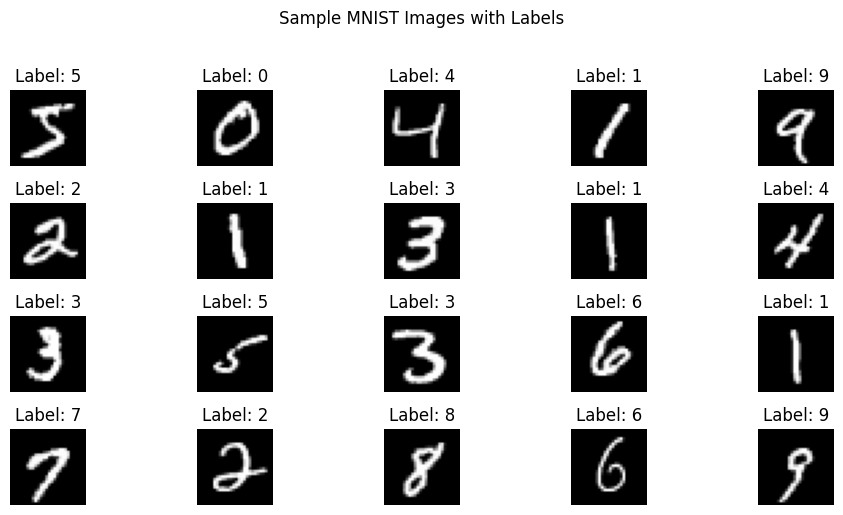

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.tight_layout()
plt.show()

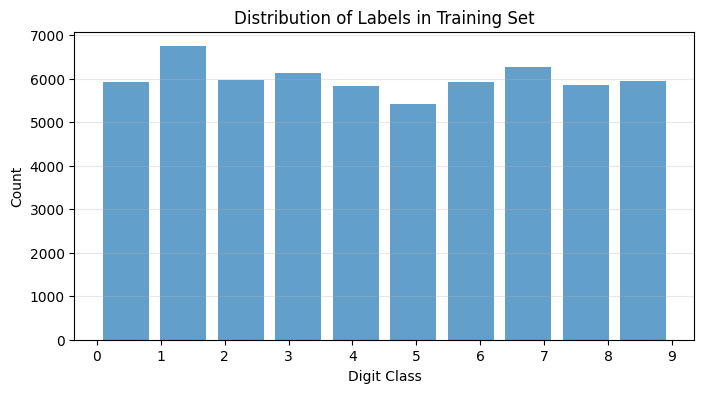

In [ ]:

plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model = Sequential([
    Dense(784, activation='tanh', input_shape=(28*28,)),
    BatchNormalization(),
    Dropout(0.25),

    Dense(392, activation='tanh'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(196, activation='tanh'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(64, activation='tanh'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(10, activation='softmax')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(train_images, train_labels, epochs=18, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/18
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9873 - loss: 0.0402 - val_accuracy: 0.9820 - val_loss: 0.0633
Epoch 2/18
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9862 - loss: 0.0436 - val_accuracy: 0.9824 - val_loss: 0.0646
Epoch 3/18
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9877 - loss: 0.0401 - val_accuracy: 0.9841 - val_loss: 0.0627
Epoch 4/18
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9883 - loss: 0.0399 - val_accuracy: 0.9838 - val_loss: 0.0643
Epoch 5/18
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9879 - loss: 0.0388 - val_accuracy: 0.9837 - val_loss: 0.0652
Epoch 6/18
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9882 - loss: 0.0388 - val_accuracy: 0.9831 - val_loss: 0.0648
Epoch 7/18
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9838 - val_loss: 0.0650
Epoch 8/18
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.9888 - loss: 0.0387 - 

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9822 - loss: 0.0799

Test accuracy: 0.9839


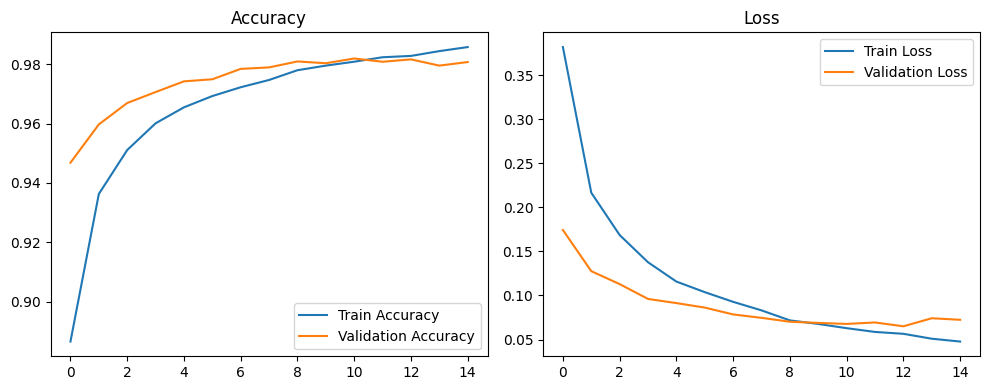

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

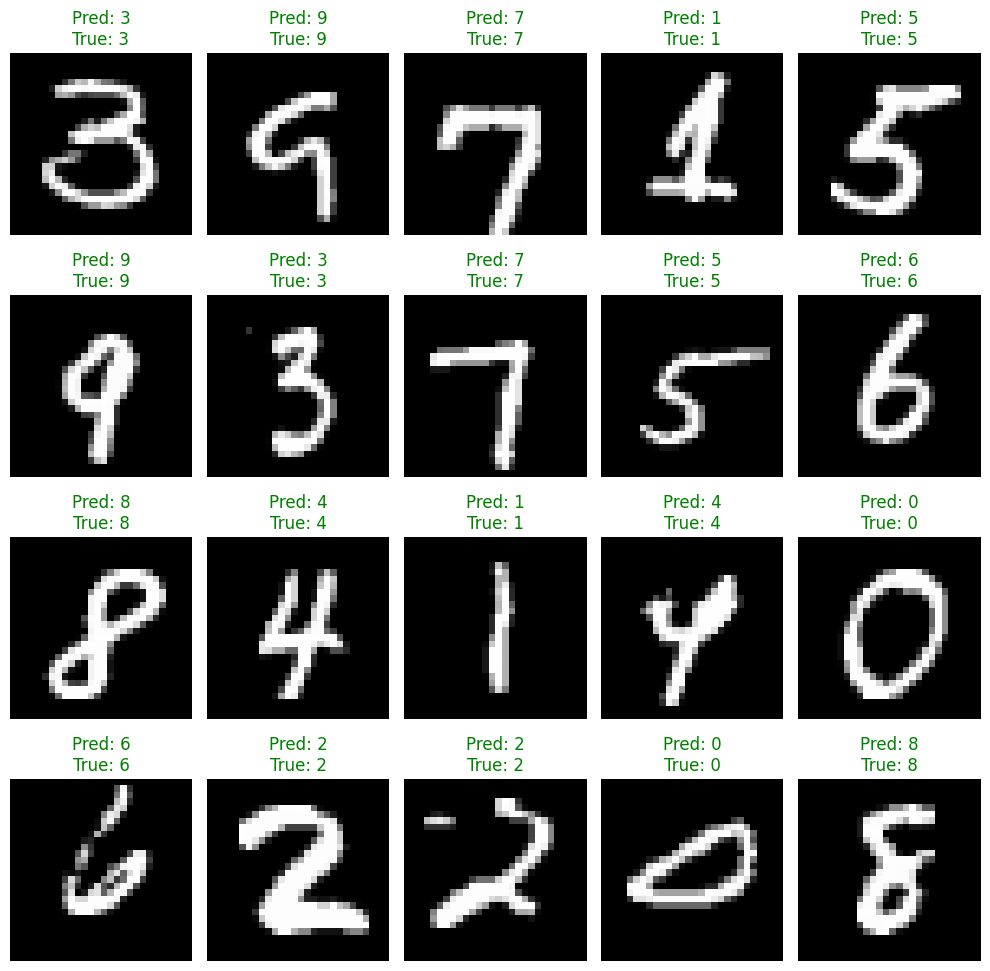

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create a list of shuffled indices
indices = np.random.permutation(len(test_images))

# Prepare digit counters
unique_digits = list(range(10))
count_per_digit = {digit: 0 for digit in unique_digits}
max_count_per_digit = 2  # Show 2 images per digit

# Track how many have been shown
shown = 0
i = 0

plt.figure(figsize=(10, 10))

# Loop until 2 examples per digit are shown
while shown < 20 and i < len(indices):
    idx = indices[i]
    true_label = test_labels[idx]

    if count_per_digit[true_label] < max_count_per_digit:
        # Plot the image
        plt.subplot(4, 5, shown + 1)
        plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')

        # Predict and color-code
        pred_label = np.argmax(model.predict(test_images[idx:idx+1], verbose=0))
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis('off')

        count_per_digit[true_label] += 1
        shown += 1

    i += 1

plt.tight_layout()
plt.show()